In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [9]:
df=pd.read_csv('/kaggle/input/life-expectancy/Life Expectancy Data.csv')
df.shape
print(df.head(5))

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [62]:
df.columns

Index(['Country', 'Year', 'Life expectancy ', 'Measles ', ' BMI ', 'GDP',
       'Population'],
      dtype='object')

In [11]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [61]:
df.dtypes

Country              object
Year                  int64
Life expectancy     float64
Measles               int64
 BMI                float64
GDP                 float64
Population          float64
dtype: object

In [15]:
df.describe

<bound method NDFrame.describe of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   

In [60]:
df.describe

<bound method NDFrame.describe of           Country  Year  Life expectancy   Measles    BMI          GDP  \
0     Afghanistan  2015              65.0      1154   19.1  584.259210   
1     Afghanistan  2014              59.9       492   18.6  612.696514   
2     Afghanistan  2013              59.9       430   18.1  631.744976   
3     Afghanistan  2012              59.5      2787   17.6  669.959000   
4     Afghanistan  2011              59.2      3013   17.2   63.537231   
...           ...   ...               ...       ...    ...         ...   
2933     Zimbabwe  2004              44.3        31   27.1  454.366654   
2934     Zimbabwe  2003              44.5       998   26.7  453.351155   
2935     Zimbabwe  2002              44.8       304   26.3   57.348340   
2936     Zimbabwe  2001              45.3       529   25.9  548.587312   
2937     Zimbabwe  2000              46.0      1483   25.5  547.358878   

      Population  
0     33736494.0  
1       327582.0  
2     31731688.0  
3

In [63]:
df.loc[df.duplicated(subset=['Country', 'Year', 'Life expectancy ', 'Measles ', ' BMI ', 'GDP',
       'Population'])]  .reset_index(drop=True).copy()

,Country,Year,Life expectancy,Measles,BMI,GDP,Population


In [42]:
#convert
pd.to_numeric(df['Year'])

0       2015
1       2014
2       2013
3       2012
4       2011
        ... 
2933    2004
2934    2003
2935    2002
2936    2001
2937    2000
Name: Year, Length: 2938, dtype: int64

#rename the columns
df.columns

In [45]:
#rename the columns 
df.columns
df.rename(columns={'Country':'Country'})

,country,Year,Life expectancy,Measles,BMI,GDP,Population
0,Afghanistan,2015,65.0,1154,19.1,584.259210,33736494.0
1,Afghanistan,2014,59.9,492,18.6,612.696514,327582.0
2,Afghanistan,2013,59.9,430,18.1,631.744976,31731688.0
3,Afghanistan,2012,59.5,2787,17.6,669.959000,3696958.0
4,Afghanistan,2011,59.2,3013,17.2,63.537231,2978599.0
...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,31,27.1,454.366654,12777511.0
2934,Zimbabwe,2003,44.5,998,26.7,453.351155,12633897.0
2935,Zimbabwe,2002,44.8,304,26.3,57.348340,125525.0
2936,Zimbabwe,2001,45.3,529,25.9,548.587312,12366165.0


In [46]:
df.duplicated

<bound method DataFrame.duplicated of           Country  Year  Life expectancy   Measles    BMI          GDP  \
0     Afghanistan  2015              65.0      1154   19.1  584.259210   
1     Afghanistan  2014              59.9       492   18.6  612.696514   
2     Afghanistan  2013              59.9       430   18.1  631.744976   
3     Afghanistan  2012              59.5      2787   17.6  669.959000   
4     Afghanistan  2011              59.2      3013   17.2   63.537231   
...           ...   ...               ...       ...    ...         ...   
2933     Zimbabwe  2004              44.3        31   27.1  454.366654   
2934     Zimbabwe  2003              44.5       998   26.7  453.351155   
2935     Zimbabwe  2002              44.8       304   26.3   57.348340   
2936     Zimbabwe  2001              45.3       529   25.9  548.587312   
2937     Zimbabwe  2000              46.0      1483   25.5  547.358878   

      Population  
0     33736494.0  
1       327582.0  
2     31731688.0

In [30]:
df.drop(['Measles '],axis=1)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [54]:
df.loc[df.duplicated(subset=['Country', 'Year', 'Life expectancy ', 'Measles ', ' BMI ', 'GDP',
       'Population'])]  .reset_index(drop=True).copy()

,Country,Year,Life expectancy,Measles,BMI,GDP,Population


In [52]:
df.columns

Index(['Country', 'Year', 'Life expectancy ', 'Measles ', ' BMI ', 'GDP',
       'Population'],
      dtype='object')

In [50]:
#duplicates
df.query('Country == "India"')

,Country,Year,Life expectancy,Measles,BMI,GDP,Population
1186,India,2015,68.3,90387,18.7,1613.188780,1.395398e+06
1187,India,2014,68.0,79563,18.1,1573.118890,1.293859e+09
1188,India,2013,67.6,13822,17.5,1452.195373,1.278562e+08
1189,India,2012,67.3,18668,17.0,1446.985410,1.263659e+08
1190,India,2011,66.8,33634,16.4,1461.671957,1.247236e+08
1191,India,2010,66.4,31458,15.9,1345.771530,1.239869e+07
1192,India,2009,66.0,56188,15.4,19.317765,1.214271e+08
1193,India,2008,65.5,44258,14.9,991.484634,1.197147e+08
1194,India,2007,65.2,41144,14.4,118.166373,1.179681e+09
1195,India,2006,64.8,64185,13.9,792.259698,1.161978e+09


<Axes: xlabel='Year'>

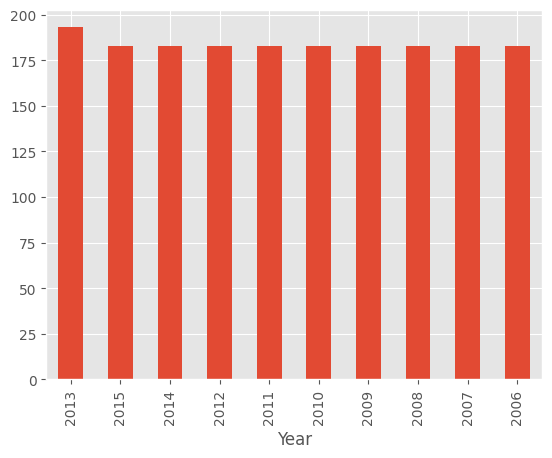

In [71]:
df['Year'].value_counts().head(10).plot(kind='bar')